In [26]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [19]:
dataset = pd.read_csv('StudentsPerformance.csv')

In [20]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


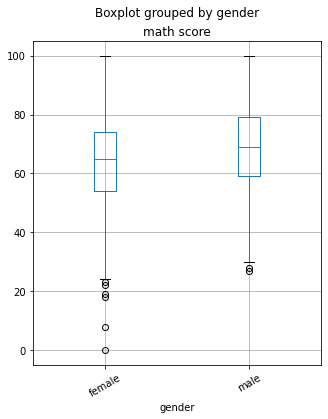

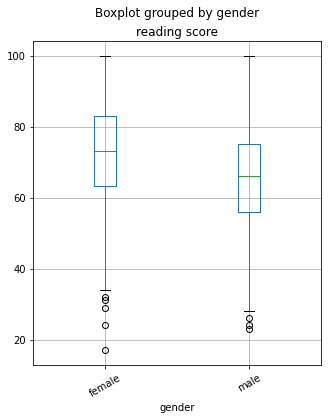

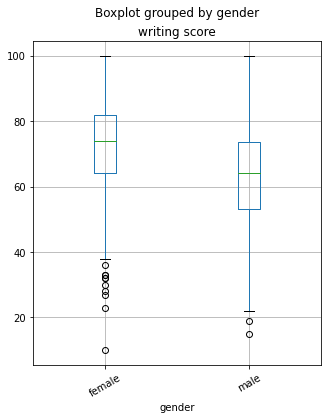

In [25]:
dataset.boxplot('math score','gender',rot = 30,figsize=(5,6))
dataset.boxplot('reading score','gender',rot = 30,figsize=(5,6))
dataset.boxplot('writing score','gender',rot = 30,figsize=(5,6))

In [27]:
categorical_data = dataset.select_dtypes(include=['object']).copy()

In [28]:
categorical_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [33]:
print(categorical_data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64


In [35]:
print(categorical_data['parental level of education'].value_counts())

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


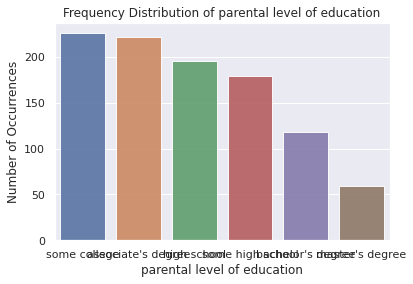

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')


In [49]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
edu_count = categorical_data['parental level of education'].value_counts()
sns.set(style="darkgrid")
sns.barplot(edu_count.index, edu_count.values, alpha=0.9)
plt.title('Frequency Distribution of parental level of education')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('parental level of education', fontsize=12)
plt.show()
print(edu_count.index)

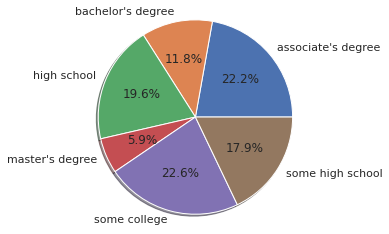

In [51]:
labels = categorical_data['parental level of education'].astype('category').cat.categories.tolist()
counts = categorical_data['parental level of education'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

/home/pollymorphism/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


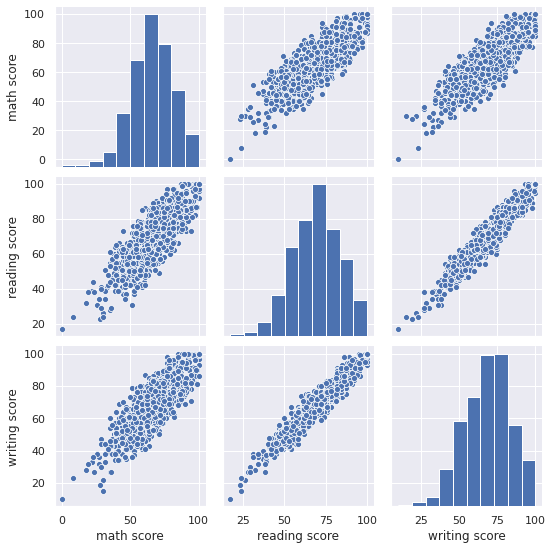

In [54]:
#scatterplot
sns.set()
cols = ['math score', 'reading score', 'writing score']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();


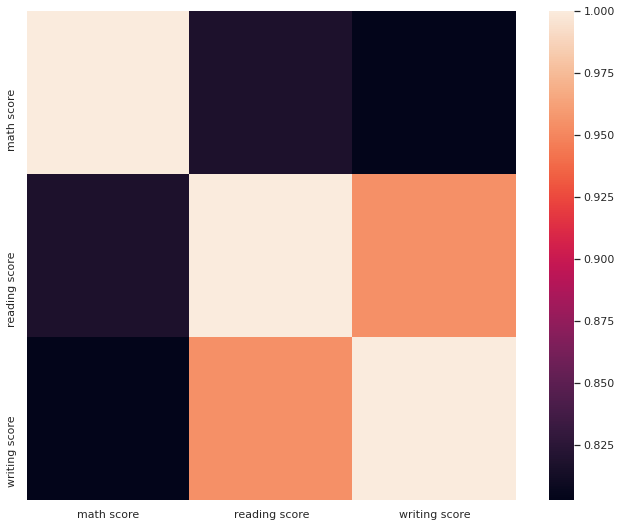

In [59]:
#correlation matrix
X = dataset.iloc[:, -3:]

corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);


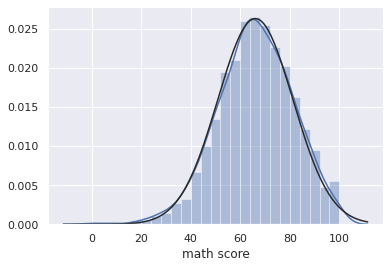

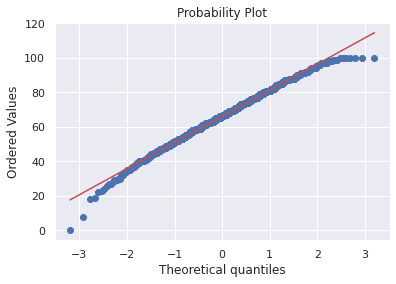

In [65]:
from scipy.stats import norm
from scipy import stats

sns.distplot(X['math score'], fit=norm);
fig = plt.figure()
res = stats.probplot(X['math score'], plot=plt)



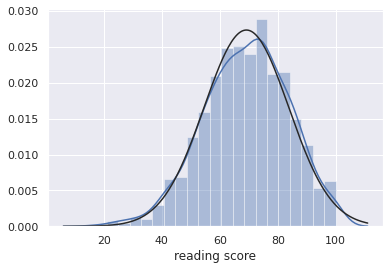

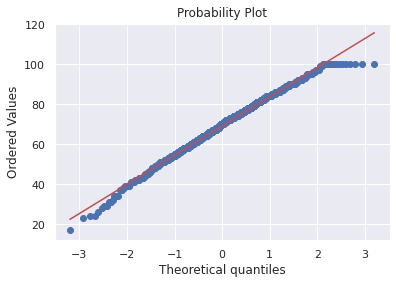

In [66]:
sns.distplot(X['reading score'], fit=norm);
fig = plt.figure()
res = stats.probplot(X['reading score'], plot=plt)


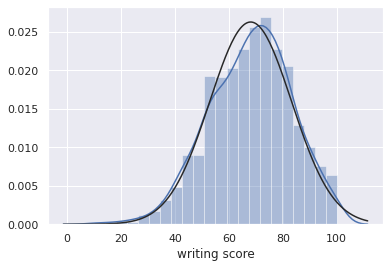

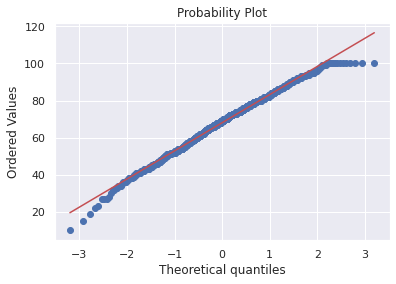

In [67]:
sns.distplot(X['writing score'], fit=norm);
fig = plt.figure()
res = stats.probplot(X['writing score'], plot=plt)